### Mopsy and Mocha ####

#### Introduction ###
Here in this machine learning project, we will be using the concept of convolutional linear regression, where we will be interaction a set of images, some with a dog and others with a cat. The data set has already been divided into a testing and training set, where we will begin to train a model to identify cats, dogs, and the differences between them.


Below is some code that allows for the importing of all images as a Numpy array, for which the skimage library was used. First, all related libraries were imported.

In [1]:
import sys, os
import skimage.io, skimage.color
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This function returns the shape of an image, given a folder path and a filename. This is returned as a Numpy array.

In [2]:
def get_image_resolution(folder, file):
    full_path = os.path.join(folder, file)
    img_data = skimage.io.imread(full_path)
    bw_data = skimage.color.rgb2gray(img_data)
    return bw_data.shape

As a proof of concept to show that pictures could be read, all training dog pictures were opened into a Numpy array, where the `get_image_resolution()` function extracted the shape as long as the image is opened. Only one folder is needed for this proof of concept.

In [22]:
# First, we need to get every single file.
training_dog_folder = "training_set/dogs"
test_dog_folder = "test_set/dogs"

training_dog_paths = os.listdir(training_dog_folder)
training_dog_resolutions = [get_image_resolution(training_dog_folder, i) for i in training_dog_paths]

print(training_dog_resolutions)

[(239, 300), (375, 499), (474, 337), (343, 349), (349, 238), (467, 499), (375, 499), (332, 500), (375, 499), (387, 499), (152, 169), (309, 296), (175, 174), (479, 340), (425, 400), (275, 268), (375, 499), (499, 375), (333, 499), (257, 238), (425, 328), (377, 499), (500, 376), (499, 375), (331, 500), (499, 411), (194, 400), (444, 500), (399, 267), (384, 500), (387, 474), (485, 480), (375, 499), (248, 375), (431, 500), (418, 411), (500, 443), (382, 286), (374, 500), (376, 368), (373, 500), (374, 500), (335, 448), (500, 366), (382, 350), (500, 391), (374, 500), (374, 500), (499, 486), (170, 250), (474, 393), (359, 480), (374, 500), (498, 500), (374, 500), (375, 499), (348, 450), (332, 500), (375, 499), (374, 500), (191, 320), (388, 500), (454, 499), (174, 141), (374, 500), (450, 446), (500, 316), (120, 159), (359, 336), (487, 499), (231, 310), (500, 395), (418, 499), (499, 489), (499, 420), (50, 57), (445, 289), (334, 499), (499, 494), (390, 292), (288, 384), (500, 385), (281, 300), (375,

With these resolutions, next week, the resolutions will be filtered using a histogram, so comparisons can only be made between similarly sized pictures. Since reading these resolutions requires getting the shape of each Numpy array of pixels, it indicates that every image file in a folder of pictures was opened.

Our progress is available at https://github.com/andy64734/all-might.

In [14]:
HORIZ_INDEX = 0
VERT_INDEX = 1

horiz_reses = pd.Series([i[HORIZ_INDEX] for i in training_dog_resolutions])
vert_reses = pd.Series([i[VERT_INDEX] for i in training_dog_resolutions])
print(horiz_reses.mode())
print(vert_reses.mode())

0    374
dtype: int64
0    500
dtype: int64


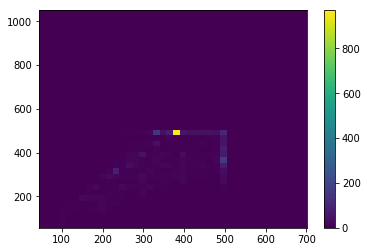

In [13]:
"""
plt.hist2d(horiz_reses,vert_reses,bins=40)
plt.colorbar()
plt.show()
"""

Text(336.971,0.5,'Vertival')

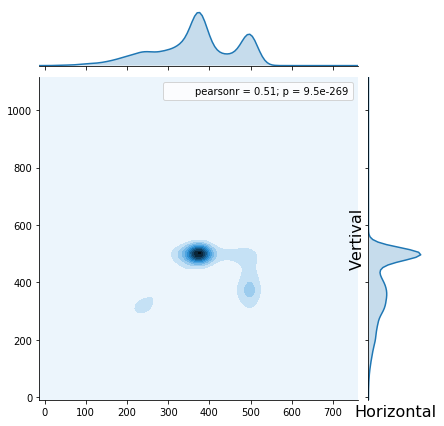

In [5]:
%matplotlib inline
sns.jointplot(np.array(horiz_reses), np.array(vert_reses), kind="kde")
plt.xlabel("Horizontal", fontsize=16)
plt.ylabel("Vertival", fontsize=16)

In [8]:
"""
Generates a Pandas DataFrame, corresponding all the paths and resolutions
into appropriate columns.
"""
def generate_df(paths, reses):
    horiz = [i[0] for i in reses]
    vert = [i[1] for i in reses]
    
    df = pd.DataFrame({'path': paths, 'horiz': horiz, 'vert': vert })    
    return df

In [9]:
training_dog_df = generate_df(training_dog_paths, training_dog_resolutions)
print(training_dog_df)

374.0
0    374
dtype: int64

421.0
0    500
dtype: int64
              path  horiz  vert
1     dog.3789.jpg    375   499
6     dog.2477.jpg    375   499
7     dog.2920.jpg    332   500
8     dog.3747.jpg    375   499
9      dog.820.jpg    387   499
16    dog.1358.jpg    375   499
18    dog.3214.jpg    333   499
21    dog.2450.jpg    377   499
24      dog.59.jpg    331   500
27    dog.3966.jpg    444   500
29     dog.752.jpg    384   500
30     dog.636.jpg    387   474
32    dog.3192.jpg    375   499
34     dog.202.jpg    431   500
35     dog.702.jpg    418   411
38    dog.2995.jpg    374   500
40    dog.1124.jpg    373   500
41    dog.3537.jpg    374   500
42     dog.214.jpg    335   448
46    dog.3329.jpg    374   500
47    dog.2583.jpg    374   500
51     dog.461.jpg    359   480
52    dog.3577.jpg    374   500
54     dog.842.jpg    374   500
55    dog.1418.jpg    375   499
56    dog.1275.jpg    348   450
57    dog.2171.jpg    332   500
58    dog.3242.jpg    375   499
59    dog.3312.

/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
sns.jointplot(training_dog_df['horiz'], training_dog_df['vert'], kind="kde")
sns.axes_style("darkgrid")

In [ ]:
print(training_dog_df['horiz'].median())
print(training_dog_df['horiz'].mode())
print()
print(training_dog_df['vert'].median())
print(training_dog_df['vert'].mode())

In [28]:
def filter_df_by_res(df, horiz, vert):
    df = df[df['horiz'] == horiz]
    df = df[df['vert'] == vert]
    return df

In [ ]:
notched = filter_df_by_res(training_dog_df, 374, 500)

In [ ]:
notched.shape

In [24]:
test_dog_paths = os.listdir(test_dog_folder)
test_dog_resolutions = [get_image_resolution(test_dog_folder, i) for i in test_dog_paths]

In [25]:
HORIZ_INDEX = 0
VERT_INDEX = 1

horiz_reses = pd.Series([i[HORIZ_INDEX] for i in test_dog_resolutions])
vert_reses = pd.Series([i[VERT_INDEX] for i in test_dog_resolutions])
print(horiz_reses.mode())
print(vert_reses.mode())

0    374
dtype: int64
0    500
dtype: int64


In [26]:
test_dog_df = generate_df(test_dog_paths, test_dog_resolutions)

374.0
0    374
dtype: int64

423.0
0    500
dtype: int64


/home/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [29]:
test_dog_df = filter_df_by_res(test_dog_df, 374, 500)

In [31]:
test_dog_df.shape

(108, 3)

In [35]:
for file in training_dog_df['path']:
    skimage.io.imread(os.path.join(training_dog_folder, file), as_gray = True)